In [1]:
##############################################################################################################
# DESCRIPTION: Carga un modelo.
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################
import os, sys

IMG_WIDTH = 256
IMG_HEIGHT = 256

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "unet-0100_1000-256-b-nadam-b"

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

IMG_PATH = os.path.abspath(os.path.join('../../dataset/cases/', IMG_CASE))
IMG_PATH_VALID = os.path.join( IMG_PATH , 'validation')
IMG_PATH_TEST = IMG_PATH + "/test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../tests/', SAVED_MODEL))

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
    
import DatasetUtilsTifF as dsutils
#import TrainModelB as train
import ReportsI as reports
import keras.models

In [4]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid \
    = dsutils.readDataset( IMG_PATH_TRAIN, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid \
    = dsutils.readDataset( IMG_PATH_VALID, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid \
    = dsutils.reshapeDataset( train_noisy, train_nitid, IMG_WIDTH, IMG_HEIGHT )

val_noisy, val_nitid \
    = dsutils.reshapeDataset( val_noisy, val_nitid, IMG_WIDTH, IMG_HEIGHT )

Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000
Noisy files:606
Nitid files:606
Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000\validation
Noisy files:148
Nitid files:148


In [5]:
model = keras.models.load_model(os.path.abspath(os.path.join('../../saves/' + SAVED_MODEL)))

In [6]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Images count =148
Best MSE     =147 (0.99)
Best Accuracy=148 (1.00)
MSE-NZ   Pred=0.0009  Noisy=0.0126
MSE      Pred=0.0009  Noisy=0.0111
PSNR     Pred=21.6 dB Noisy=10.8 dB
Accuracy Pred=0.34    Noisy=0.08


In [7]:
import csv

with open(DEST_TESTS + '/metrics.csv', 'w', newline='') as file_csv:
    write = csv.writer(file_csv)
    write.writerow( predictions_headers )
    write.writerows(predictions_metrics )

Read dataset. Path: D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test/
Noisy files:8
Nitid files:8
Index:0
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0112_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0112_01_02nitid_idx134.tif


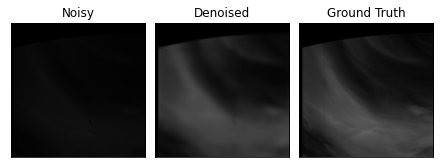

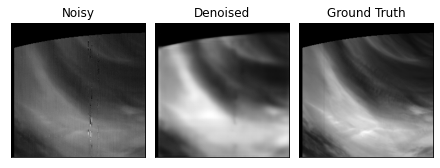

MSE-NZ   Pred=0.0005  Noisy=0.0221
MSE      Pred=0.0005  Noisy=0.0191 BEST
PSNR     Pred=24.7 dB Noisy=8.4 dB BEST
Accuracy Pred=0.44    Noisy=0.00 BEST
******************************************************
Index:1
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0127_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0127_01_02nitid_idx134.tif


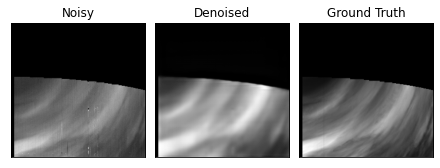

MSE-NZ   Pred=0.0004  Noisy=0.0177
MSE      Pred=0.0004  Noisy=0.0101 BEST
PSNR     Pred=26.1 dB Noisy=9.5 dB BEST
Accuracy Pred=0.61    Noisy=0.05 BEST
******************************************************
Index:2
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0318_04_03noisy_idx157.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0318_04_03nitid_idx146.tif


MSE-NZ   Pred=0.0005  Noisy=0.0065
MSE      Pred=0.0005  Noisy=0.0047 BEST
PSNR     Pred=18.1 dB Noisy=6.9 dB BEST
Accuracy Pred=0.45    Noisy=0.04 BEST
******************************************************
Index:3
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_00noisy_idx014.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_00nitid_idx017.tif


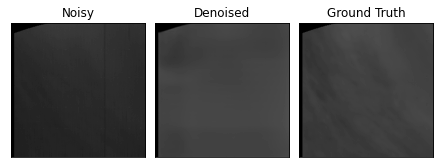

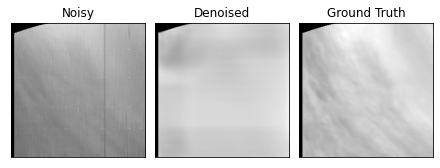

MSE-NZ   Pred=0.0007  Noisy=0.0071
MSE      Pred=0.0007  Noisy=0.0068 BEST
PSNR     Pred=21.3 dB Noisy=11.3 dB BEST
Accuracy Pred=0.23    Noisy=0.00 BEST
******************************************************
Index:4
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0322_04_02nitid_idx134.tif


MSE-NZ   Pred=0.0012  Noisy=0.0130
MSE      Pred=0.0012  Noisy=0.0126 BEST
PSNR     Pred=19.9 dB Noisy=9.4 dB BEST
Accuracy Pred=0.12    Noisy=0.02 BEST
******************************************************
Index:5
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0323_04_03noisy_idx157.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0323_04_03nitid_idx146.tif


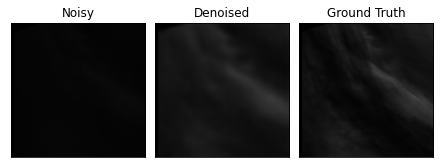

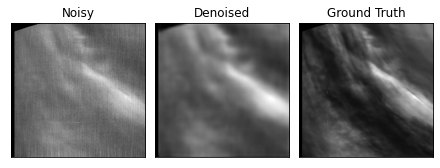

MSE-NZ   Pred=0.0007  Noisy=0.0041
MSE      Pred=0.0007  Noisy=0.0039 BEST
PSNR     Pred=20.6 dB Noisy=12.9 dB BEST
Accuracy Pred=0.29    Noisy=0.12 BEST
******************************************************
Index:6
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_01_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_01_02nitid_idx134.tif


MSE-NZ   Pred=0.0012  Noisy=0.0140
MSE      Pred=0.0012  Noisy=0.0137 BEST
PSNR     Pred=23.0 dB Noisy=12.4 dB BEST
Accuracy Pred=0.20    Noisy=0.08 BEST
******************************************************
Index:7
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_05_02noisy_idx123.tif
D:\UNIR\TFM\VenusDenoise\dataset\cases\256\0100_1000/test\VI0379_05_02nitid_idx134.tif


MSE-NZ   Pred=0.0011  Noisy=0.0054
MSE      Pred=0.0011  Noisy=0.0052 BEST
PSNR     Pred=20.1 dB Noisy=13.4 dB BEST
Accuracy Pred=0.32    Noisy=0.22 BEST
******************************************************


In [8]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid \
    = dsutils.readDataset( IMG_PATH_TEST, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid \
    = dsutils.reshapeDataset( test_noisy, test_nitid, IMG_WIDTH, IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD )